# Exploratory Data Analysis
### Author: Shuo Xu

#### Import packages

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

#### Import data

In [2]:
df_bridge = pd.read_csv('bridge.csv')
df_claims = pd.read_csv('dim_claims.csv')
df_date = pd.read_csv('dim_date.csv')
df_pa = pd.read_csv('dim_pa.csv')

In [3]:
df_bridge.head()

,dim_claim_id,dim_pa_id,dim_date_id
0,1,1.0,1
1,2,NaN,1
2,3,2.0,1
3,4,NaN,1
4,5,NaN,1


In [4]:
df_bridge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1335576 entries, 0 to 1335575
Data columns (total 3 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   dim_claim_id  1335576 non-null  int64  
 1   dim_pa_id     555951 non-null   float64
 2   dim_date_id   1335576 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 30.6 MB


In [5]:
df_claims.head()

,dim_claim_id,bin,drug,reject_code,pharmacy_claim_approved
0,1,417380,A,75.0,0
1,2,999001,A,NaN,1
2,3,417740,A,76.0,0
3,4,999001,A,NaN,1
4,5,417740,A,NaN,1


In [6]:
df_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1335576 entries, 0 to 1335575
Data columns (total 5 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   dim_claim_id             1335576 non-null  int64  
 1   bin                      1335576 non-null  int64  
 2   drug                     1335576 non-null  object 
 3   reject_code              555951 non-null   float64
 4   pharmacy_claim_approved  1335576 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 50.9+ MB


In [7]:
df_pa.head()

,dim_pa_id,correct_diagnosis,tried_and_failed,contraindication,pa_approved
0,1,1,1,0,1
1,2,1,0,0,1
2,3,0,0,1,1
3,4,1,1,0,1
4,5,0,1,0,1


In [8]:
df_pa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555951 entries, 0 to 555950
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   dim_pa_id          555951 non-null  int64
 1   correct_diagnosis  555951 non-null  int64
 2   tried_and_failed   555951 non-null  int64
 3   contraindication   555951 non-null  int64
 4   pa_approved        555951 non-null  int64
dtypes: int64(5)
memory usage: 21.2 MB


In [9]:
df_date.head()

,dim_date_id,date_val,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday
0,1,2017-01-01,2017,1,1,1,0,0,1
1,2,2017-01-02,2017,1,2,2,1,0,0
2,3,2017-01-03,2017,1,3,3,1,1,0
3,4,2017-01-04,2017,1,4,4,1,1,0
4,5,2017-01-05,2017,1,5,5,1,1,0


In [20]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   dim_date_id     1520 non-null   int64 
 1   date_val        1520 non-null   object
 2   calendar_year   1520 non-null   int64 
 3   calendar_month  1520 non-null   int64 
 4   calendar_day    1520 non-null   int64 
 5   day_of_week     1520 non-null   int64 
 6   is_weekday      1520 non-null   int64 
 7   is_workday      1520 non-null   int64 
 8   is_holiday      1520 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 107.0+ KB


#### Time Series of Claims

In [44]:
result1 = pd.merge(df_bridge, df_claims, how="inner", on=["dim_claim_id"])
df_claims_ts = pd.merge(result1, df_date, how = "inner", on = ["dim_date_id"])

In [45]:
df_claims_ts.head()

,dim_claim_id,dim_pa_id,dim_date_id,bin,drug,reject_code,pharmacy_claim_approved,date_val,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday
0,1,1.0,1,417380,A,75.0,0,2017-01-01,2017,1,1,1,0,0,1
1,2,NaN,1,999001,A,NaN,1,2017-01-01,2017,1,1,1,0,0,1
2,3,2.0,1,417740,A,76.0,0,2017-01-01,2017,1,1,1,0,0,1
3,4,NaN,1,999001,A,NaN,1,2017-01-01,2017,1,1,1,0,0,1
4,5,NaN,1,417740,A,NaN,1,2017-01-01,2017,1,1,1,0,0,1


In [46]:
df_claims_ts.to_csv(r'C:\Users\xushu\Downloads\CoverMyMeds_data-20210503T170046Z-001\CoverMyMeds_data\Claims_Time_Series.csv', index = False)

#### Time Series of PA

In [47]:
result2 = pd.merge(df_bridge, df_pa, how="inner", on=["dim_pa_id"])
df_pa_ts = pd.merge(result2, df_date, how = "inner", on = ["dim_date_id"])

In [48]:
df_pa_ts.head()

,dim_claim_id,dim_pa_id,dim_date_id,correct_diagnosis,tried_and_failed,contraindication,pa_approved,date_val,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday
0,1,1.0,1,1,1,0,1,2017-01-01,2017,1,1,1,0,0,1
1,3,2.0,1,1,0,0,1,2017-01-01,2017,1,1,1,0,0,1
2,10,3.0,1,0,0,1,1,2017-01-01,2017,1,1,1,0,0,1
3,11,4.0,1,1,1,0,1,2017-01-01,2017,1,1,1,0,0,1
4,15,5.0,1,0,1,0,1,2017-01-01,2017,1,1,1,0,0,1


In [49]:
df_pa_ts.to_csv(r'C:\Users\xushu\Downloads\CoverMyMeds_data-20210503T170046Z-001\CoverMyMeds_data\PA_Time_Series.csv', index = False)

#### Time Series of All

In [50]:
df = pd.merge(df_claims_ts, df_pa, how = "left", on = ["dim_pa_id"])

In [51]:
df.head()

,dim_claim_id,dim_pa_id,dim_date_id,bin,drug,reject_code,pharmacy_claim_approved,date_val,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday,correct_diagnosis,tried_and_failed,contraindication,pa_approved
0,1,1.0,1,417380,A,75.0,0,2017-01-01,2017,1,1,1,0,0,1,1.0,1.0,0.0,1.0
1,2,NaN,1,999001,A,NaN,1,2017-01-01,2017,1,1,1,0,0,1,NaN,NaN,NaN,NaN
2,3,2.0,1,417740,A,76.0,0,2017-01-01,2017,1,1,1,0,0,1,1.0,0.0,0.0,1.0
3,4,NaN,1,999001,A,NaN,1,2017-01-01,2017,1,1,1,0,0,1,NaN,NaN,NaN,NaN
4,5,NaN,1,417740,A,NaN,1,2017-01-01,2017,1,1,1,0,0,1,NaN,NaN,NaN,NaN


In [52]:
df.to_csv(r'C:\Users\xushu\Downloads\CoverMyMeds_data-20210503T170046Z-001\CoverMyMeds_data\All_Time_Series.csv', index = False)

## Exploratory Analysis

In [53]:
df.head()

,dim_claim_id,dim_pa_id,dim_date_id,bin,drug,reject_code,pharmacy_claim_approved,date_val,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday,correct_diagnosis,tried_and_failed,contraindication,pa_approved
0,1,1.0,1,417380,A,75.0,0,2017-01-01,2017,1,1,1,0,0,1,1.0,1.0,0.0,1.0
1,2,NaN,1,999001,A,NaN,1,2017-01-01,2017,1,1,1,0,0,1,NaN,NaN,NaN,NaN
2,3,2.0,1,417740,A,76.0,0,2017-01-01,2017,1,1,1,0,0,1,1.0,0.0,0.0,1.0
3,4,NaN,1,999001,A,NaN,1,2017-01-01,2017,1,1,1,0,0,1,NaN,NaN,NaN,NaN
4,5,NaN,1,417740,A,NaN,1,2017-01-01,2017,1,1,1,0,0,1,NaN,NaN,NaN,NaN


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1335576 entries, 0 to 1335575
Data columns (total 19 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   dim_claim_id             1335576 non-null  int64  
 1   dim_pa_id                555951 non-null   float64
 2   dim_date_id              1335576 non-null  int64  
 3   bin                      1335576 non-null  int64  
 4   drug                     1335576 non-null  object 
 5   reject_code              555951 non-null   float64
 6   pharmacy_claim_approved  1335576 non-null  int64  
 7   date_val                 1335576 non-null  object 
 8   calendar_year            1335576 non-null  int64  
 9   calendar_month           1335576 non-null  int64  
 10  calendar_day             1335576 non-null  int64  
 11  day_of_week              1335576 non-null  int64  
 12  is_weekday               1335576 non-null  int64  
 13  is_workday               1335576 non-null 

#### Get the list of Companies

In [55]:
Companies = []
for i in range(len(df.bin.unique())):
    Companies.append(str(df.bin.unique()[i]))
Companies

['417380', '999001', '417740', '417614']

#### Get the list of Drugs

In [56]:
Drugs = []
for i in range(len(df.drug.unique())):
    Drugs.append(df.drug.unique()[i])
Drugs

['A', 'B', 'C']

#### Get the list of Rejection Codes.

In [57]:
Rej_Codes = []
for i in range(len(df.reject_code.unique())):
    Rej_Codes.append(df.reject_code.unique()[i])
Rej_Codes = list(filter(lambda x: str(x) != 'nan', Rej_Codes))
Rej_Codes

[75.0, 76.0, 70.0]

#### Get the Years

In [58]:
Years = []
for i in range(len(df.calendar_year.unique())):
    Years.append(df.calendar_year.unique()[i])
Years

[2017, 2018, 2019]

## Graphs

#### Graph the claim approval rates for each drug.

In [59]:
App_Rate_Drugs = []
for i in range(len(Drugs)):
    app = df[(df.drug==Drugs[i])]['pharmacy_claim_approved'].sum()
    tot = df[(df.drug==Drugs[i])]['pharmacy_claim_approved'].count()
    rate = round(app/tot,2)
    App_Rate_Drugs.append(rate)
App_Rate_Drugs

[0.58, 0.55, 0.64]

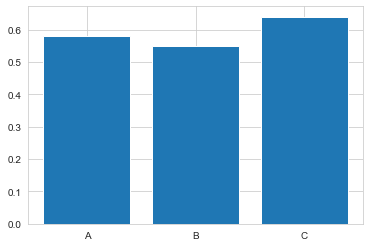

In [60]:
plt.bar(Drugs, App_Rate_Drugs)
plt.show()

#### Graph the approval rates for each insurance company.

In [61]:
App_Rate_Companies = []
for i in range(len(Companies)):
    app = df[(df.bin==int(Companies[i]))]['pharmacy_claim_approved'].sum()
    tot = df[(df.bin==int(Companies[i]))]['pharmacy_claim_approved'].count()
    rate = round(app/tot,2)
    App_Rate_Companies.append(rate)
App_Rate_Companies

[0.23, 0.9, 0.46, 0.21]

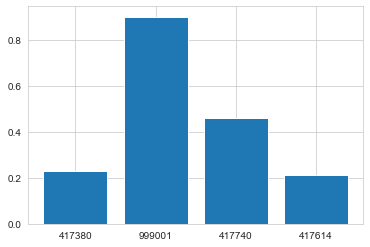

In [62]:
plt.bar(Companies, App_Rate_Companies)
plt.show()

#### Get the pa approval rates for each diagnosis status.

#### Get the list of diagnosis status.

In [63]:
Diag_Statuses = []
for i in range(len(df.correct_diagnosis.unique())):
    Diag_Statuses.append(str(df.correct_diagnosis.unique()[i]))
Diag_Statuses = list(filter(lambda x: str(x) != 'nan', Diag_Statuses))
Diag_Statuses

['1.0', '0.0']

In [64]:
App_Rate_Diags = []
for i in range(len(Diag_Statuses)):
    app = df[(df.correct_diagnosis==float(Diag_Statuses[i]))]['pa_approved'].sum()
    tot = df[(df.correct_diagnosis==float(Diag_Statuses[i]))]['pa_approved'].count()
    rate = round(app/tot,2)
    App_Rate_Diags.append(rate)
App_Rate_Diags

[0.74, 0.7]

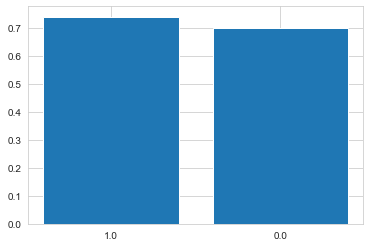

In [65]:
plt.bar(Diag_Statuses, App_Rate_Diags)
plt.show()

#### Get the pa approval rate for each tried_and_failed status.

#### Get the list of tried and failed status.

In [66]:
TF_Statuses = []
for i in range(len(df.tried_and_failed.unique())):
    TF_Statuses.append(str(df.tried_and_failed.unique()[i]))
TF_Statuses = list(filter(lambda x: str(x) != 'nan', TF_Statuses))
TF_Statuses

['1.0', '0.0']

In [67]:
test = df_pa.groupby('tried_and_failed')["pa_approved"].sum()/df_pa.tried_and_failed.value_counts()
test = test.to_numpy()

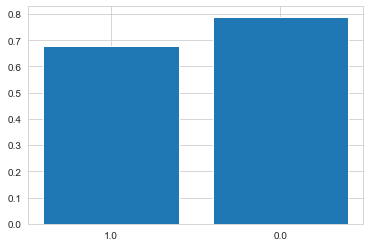

In [68]:
plt.bar(TF_Statuses, test)
plt.show()

#### Get the pa approval rate for each contraindiction status.

In [69]:
Contra_Statuses = []
for i in range(len(df.contraindication.unique())):
    Contra_Statuses.append(str(df.contraindication.unique()[i]))
Contra_Statuses = list(filter(lambda x: str(x) != 'nan', Contra_Statuses))
Contra_Statuses

['0.0', '1.0']

In [70]:
test = df_pa.groupby('contraindication')["pa_approved"].sum()/df_pa.contraindication.value_counts()
test = test.to_numpy()

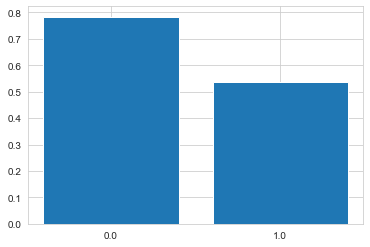

In [71]:
plt.bar(Contra_Statuses, test)
plt.show()

#### Get the pa approval rates for each rejection code. We need to join the claim table and the pa table.

In [72]:
result1 = pd.merge(df_bridge, df_claims, how="inner", on=["dim_claim_id"])

In [73]:
result1.head()

,dim_claim_id,dim_pa_id,dim_date_id,bin,drug,reject_code,pharmacy_claim_approved
0,1,1.0,1,417380,A,75.0,0
1,2,NaN,1,999001,A,NaN,1
2,3,2.0,1,417740,A,76.0,0
3,4,NaN,1,999001,A,NaN,1
4,5,NaN,1,417740,A,NaN,1


In [74]:
result2 = pd.merge(df_pa,result1,how="left", on=["dim_pa_id"])

In [75]:
result2.head()

,dim_pa_id,correct_diagnosis,tried_and_failed,contraindication,pa_approved,dim_claim_id,dim_date_id,bin,drug,reject_code,pharmacy_claim_approved
0,1,1,1,0,1,1,1,417380,A,75.0,0
1,2,1,0,0,1,3,1,417740,A,76.0,0
2,3,0,0,1,1,10,1,417380,A,75.0,0
3,4,1,1,0,1,11,1,999001,A,76.0,0
4,5,0,1,0,1,15,1,417614,A,70.0,0


In [76]:
test = result2.groupby('reject_code')["pa_approved"].sum()/result2.reject_code.value_counts()
test = test.to_numpy()

In [77]:
result2.reject_code.value_counts()

70.0    252206
75.0    217351
76.0     86394
Name: reject_code, dtype: int64

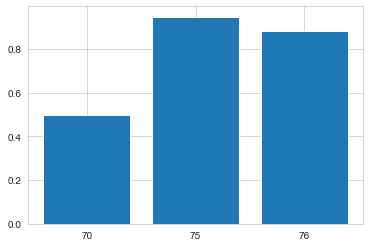

In [78]:
plt.bar(['70','75','76'], test)
plt.show()

#### Get the pa approval rate for each company

In [79]:
test = result2.groupby('bin')["pa_approved"].sum()/result2.bin.value_counts()
test = test.to_numpy()

In [80]:
result2.bin.value_counts()

417614    242268
417380    133579
417740    116031
999001     64073
Name: bin, dtype: int64

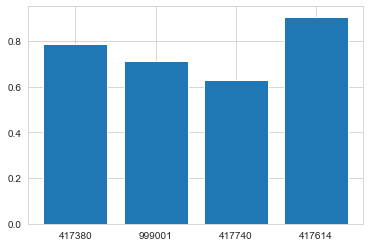

In [81]:
plt.bar(Companies, test)
plt.show()

#### Get the pa approval rate for each drug

In [82]:
test = result2.groupby('drug')["pa_approved"].sum()/result2.drug.value_counts()
test = test.to_numpy()

In [83]:
result2.drug.value_counts()

A    288292
B    154512
C    113147
Name: drug, dtype: int64

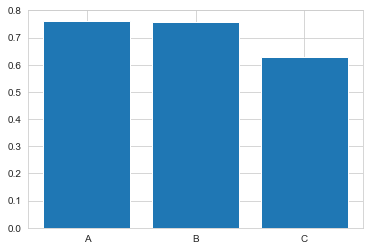

In [84]:
plt.bar(Drugs, test)
plt.show()

## Times Series Graphs

#### Variation of Claims Approval Rates over Time:

In [85]:
Claims_rates = np.zeros((len(Companies),len(Drugs),len(Years)))

In [86]:
for i in range(len(Companies)):
    for j in range(len(Drugs)):
        for k in range(len(Years)):
            app = df_claims_ts[(df_claims_ts.bin == int(Companies[i])) & (df_claims_ts.drug==Drugs[j]) & (df_claims_ts.calendar_year == Years[k])]['pharmacy_claim_approved'].sum()
            tot = df_claims_ts[(df_claims_ts.bin == int(Companies[i])) & (df_claims_ts.drug==Drugs[j]) & (df_claims_ts.calendar_year == Years[k])]['pharmacy_claim_approved'].count()
            rate = round(app/tot,2)
            Claims_rates[i][j][k] = rate

In [87]:
Claims_rates

array([[[0. , 0. , 0. ],
        [0.9, 0.9, 0.9],
        [0. , 0. , 0. ]],

       [[0.9, 0.9, 0.9],
        [0.9, 0.9, 0.9],
        [0.9, 0.9, 0.9]],

       [[0.9, 0.9, 0.9],
        [0. , 0. , 0. ],
        [0. , 0. , 0. ]],

       [[0. , 0. , 0. ],
        [0. , 0. , 0. ],
        [0.9, 0.9, 0.9]]])

##### It seems that the Pharmacy Claims policies for each insurance company and each insurance drug are the same over the years.

#### Let's plot some time series data of the claim approval rates over time. First, we convert date to date object.

In [88]:
df_claims_ts['date_val'] = pd.to_datetime(df_claims_ts['date_val'])

#### Time Series in Years

In [89]:
def claim_ts_y(company: int, drug: str, year: int):
    df1 = df_claims_ts.loc[(df_claims_ts['bin']==company) & (df_claims_ts['drug']==drug)]
    df2 = df1.loc[(df1['calendar_year']==year)]
    df3 = df2[['date_val','pharmacy_claim_approved']]
    df4 = df3.groupby(['date_val']).sum()
    df4.rename(columns = {'pharmacy_claim_approved' : 'app'}, inplace = True)
    df5 = df3.groupby(['date_val']).count()
    df5.rename(columns = {'pharmacy_claim_approved' : 'tot'}, inplace = True)
    df6 = df4.join(df5, how='outer')
    df6['rate'] = df6['app']/df6['tot']
    df7 = df6['rate']
    plt.plot(df7)
    plt.xlabel("Day", fontsize=16)
    plt.ylabel("Claim Approval Rate", fontsize=16)
    plt.show()

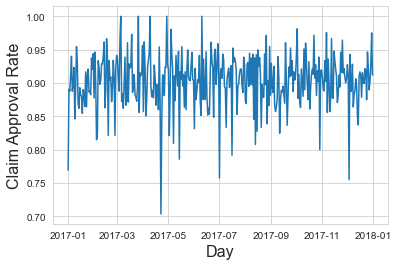

In [90]:
claim_ts_y(417740,'A',2017)

#### Time Series in Months

In [91]:
def claim_ts_y_m(company: int, drug: str, year: int,month:int):
    df1 = df_claims_ts.loc[(df_claims_ts['bin']==company) & (df_claims_ts['drug']==drug)]
    df2 = df1.loc[(df1['calendar_year']==year) & (df1['calendar_month']==month)]
    df3 = df2[['date_val','pharmacy_claim_approved']]
    df4 = df3.groupby(['date_val']).sum()
    df4.rename(columns = {'pharmacy_claim_approved' : 'app'}, inplace = True)
    df5 = df3.groupby(['date_val']).count()
    df5.rename(columns = {'pharmacy_claim_approved' : 'tot'}, inplace = True)
    df6 = df4.join(df5, how='outer')
    df6['rate'] = df6['app']/df6['tot']
    df7 = df6['rate']
    plt.plot(df7)
    plt.xlabel("Day", fontsize=16)
    plt.ylabel("Claim Approval Rate", fontsize=16)
    plt.show()

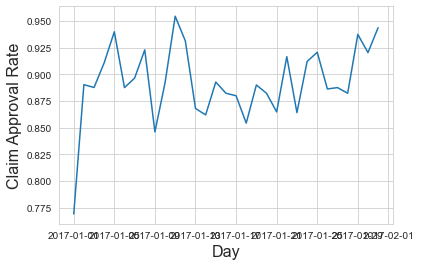

In [92]:
claim_ts_y_m(417740,'A',2017,1)

#### Time Series on/off Workdays

In [93]:
def claim_ts_y_m_w(company: int, drug: str, year: int,month:int,isworkday:int):
    df1 = df_claims_ts.loc[(df_claims_ts['bin']==company) & (df_claims_ts['drug']==drug)]
    df2 = df1.loc[(df1['calendar_year']==year) & (df1['calendar_month']==month) & (df1['is_workday']==isworkday)]
    df3 = df2[['date_val','pharmacy_claim_approved']]
    df4 = df3.groupby(['date_val']).sum()
    df4.rename(columns = {'pharmacy_claim_approved' : 'app'}, inplace = True)
    df5 = df3.groupby(['date_val']).count()
    df5.rename(columns = {'pharmacy_claim_approved' : 'tot'}, inplace = True)
    df6 = df4.join(df5, how='outer')
    df6['rate'] = df6['app']/df6['tot']
    df7 = df6['rate']
    plt.plot(df7)
    plt.xlabel("Day", fontsize=16)
    plt.ylabel("Claim Approval Rate", fontsize=16)
    plt.show()

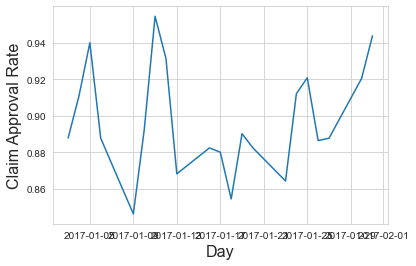

In [94]:
claim_ts_y_m_w(417740,'A',2017,1,1)

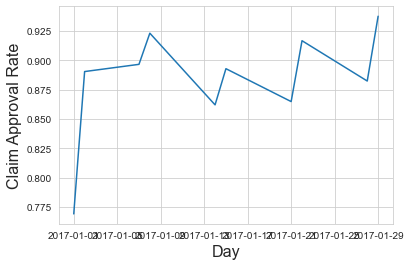

In [95]:
claim_ts_y_m_w(417740,'A',2017,1,0)

#### Variation of PA Approval Rates Over Time

In [96]:
PA_rates = np.zeros((len(Companies),len(Drugs),len(Rej_Codes),len(Years)))

In [97]:
for i in range(len(Companies)):
    for j in range(len(Drugs)):
        for k in range(len(Rej_Codes)):
            for t in range(len(Years)):
                app = df[(df.bin == int(Companies[i])) & (df.drug==Drugs[j]) & (df.reject_code==Rej_Codes[k]) & (df.calendar_year == Years[t])]['pa_approved'].sum()
                tot = df[(df.bin == int(Companies[i])) & (df.drug==Drugs[j]) & (df.reject_code==Rej_Codes[k]) & (df.calendar_year == Years[t])]['pa_approved'].count()
                if not tot:
                    PA_rates[i][j][k][t]=-1
                else:
                    rate = round(app/tot,2)
                    PA_rates[i][j][k][t] = rate

In [98]:
PA_rates

array([[[[ 0.99,  0.99,  0.99],
         [-1.  , -1.  , -1.  ],
         [-1.  , -1.  , -1.  ]],

        [[-1.  , -1.  , -1.  ],
         [ 0.9 ,  0.91,  0.91],
         [-1.  , -1.  , -1.  ]],

        [[-1.  , -1.  , -1.  ],
         [-1.  , -1.  , -1.  ],
         [ 0.33,  0.32,  0.33]]],


       [[[-1.  , -1.  , -1.  ],
         [ 0.96,  0.96,  0.96],
         [-1.  , -1.  , -1.  ]],

        [[-1.  , -1.  , -1.  ],
         [ 0.93,  0.93,  0.94],
         [-1.  , -1.  , -1.  ]],

        [[-1.  , -1.  , -1.  ],
         [ 0.76,  0.77,  0.75],
         [-1.  , -1.  , -1.  ]]],


       [[[-1.  , -1.  , -1.  ],
         [ 0.9 ,  0.9 ,  0.9 ],
         [-1.  , -1.  , -1.  ]],

        [[-1.  , -1.  , -1.  ],
         [-1.  , -1.  , -1.  ],
         [ 0.39,  0.39,  0.39]],

        [[ 0.83,  0.84,  0.83],
         [-1.  , -1.  , -1.  ],
         [-1.  , -1.  , -1.  ]]],


       [[[-1.  , -1.  , -1.  ],
         [-1.  , -1.  , -1.  ],
         [ 0.58,  0.58,  0.59]],

        [[ 0.9

##### It seems that some companies change their pa approval policies over the years.

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1335576 entries, 0 to 1335575
Data columns (total 19 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   dim_claim_id             1335576 non-null  int64  
 1   dim_pa_id                555951 non-null   float64
 2   dim_date_id              1335576 non-null  int64  
 3   bin                      1335576 non-null  int64  
 4   drug                     1335576 non-null  object 
 5   reject_code              555951 non-null   float64
 6   pharmacy_claim_approved  1335576 non-null  int64  
 7   date_val                 1335576 non-null  object 
 8   calendar_year            1335576 non-null  int64  
 9   calendar_month           1335576 non-null  int64  
 10  calendar_day             1335576 non-null  int64  
 11  day_of_week              1335576 non-null  int64  
 12  is_weekday               1335576 non-null  int64  
 13  is_workday               1335576 non-null 

In [100]:
def pa_ts_y_m_w(company: int, drug: str, rejcode: float, year: int,month:int,isworkday:int):
    df1 = df.loc[(df['bin']==company) & (df['drug']==drug) & (df['reject_code']==rejcode)]
    df2 = df1.loc[(df1['calendar_year']==year) & (df1['calendar_month']==month) & (df1['is_workday']==isworkday)]
    df3 = df2[['date_val','pharmacy_claim_approved']]
    df4 = df3.groupby(['date_val']).sum()
    df4.rename(columns = {'pharmacy_claim_approved' : 'app'}, inplace = True)
    df5 = df3.groupby(['date_val']).count()
    df5.rename(columns = {'pharmacy_claim_approved' : 'tot'}, inplace = True)
    df6 = df4.join(df5, how='outer')
    df6['rate'] = df6['app']/df6['tot']
    df7 = df6['rate']
    plt.plot(df7)
    plt.xlabel("Day", fontsize=16)
    plt.ylabel("Claim Approval Rate", fontsize=16)
    plt.show()

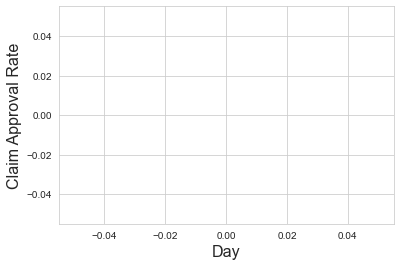

In [101]:
pa_ts_y_m_w(417614,'B',70.0, 2017,10,0)

In [102]:
def pa_ts_y_m(company: int, drug: str, rejcode: float, year: int,month:int):
    df1 = df.loc[(df['bin']==company) & (df['drug']==drug) & (df['reject_code']==rejcode)]
    df2 = df1.loc[(df1['calendar_year']==year) & (df1['calendar_month']==month)]
    df3 = df2[['date_val','pharmacy_claim_approved']]
    df4 = df3.groupby(['date_val']).sum()
    df4.rename(columns = {'pharmacy_claim_approved' : 'app'}, inplace = True)
    df5 = df3.groupby(['date_val']).count()
    df5.rename(columns = {'pharmacy_claim_approved' : 'tot'}, inplace = True)
    df6 = df4.join(df5, how='outer')
    df6['rate'] = df6['app']/df6['tot']
    df7 = df6['rate']
    plt.plot(df7)
    plt.xlabel("Day", fontsize=16)
    plt.ylabel("Claim Approval Rate", fontsize=16)
    plt.show()

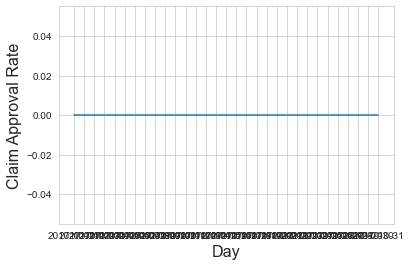

In [103]:
pa_ts_y_m(417614,'C',76.0, 2017,10)

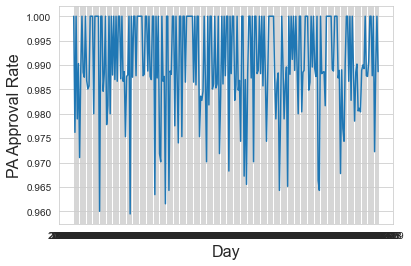

In [104]:
        df1 = df.loc[(df['bin']==417380) & (df['drug']=='A') & (df['reject_code']==75.0)]
        df2 = df1.loc[(df1['calendar_year']==2017) & (df1['is_weekday']==1)]
        df3 = df2[['date_val','pa_approved']]
        df4 = df3.groupby(['date_val']).sum()
        df4.rename(columns = {'pa_approved' : 'app'}, inplace = True)
        df5 = df3.groupby(['date_val']).count()
        df5.rename(columns = {'pa_approved' : 'tot'}, inplace = True)
        df6 = df4.join(df5, how='outer')
        df6['rate'] = df6['app']/df6['tot']
        df7 = df6['rate']
        plt.plot(df7)
        plt.xlabel("Day", fontsize=16)
        plt.ylabel("PA Approval Rate", fontsize=16)
        plt.show()

<AxesSubplot:xlabel='calendar_year,calendar_month'>

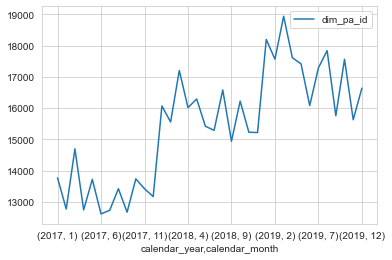

In [106]:
        df3 = df[['dim_pa_id','calendar_year','calendar_month']]
        df4 = df3.groupby(['calendar_year','calendar_month']).count()
        df4.plot()